<a href="https://colab.research.google.com/github/MeghasenaServepalli/PythonLibrararies/blob/main/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
## Here in multiple regression we have 2 independent features-
## Interest_rate, unemployment_rate, and one output feature- index_price
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df=pd.read_csv("modified_synthetic_economic_data.csv")

In [4]:
df

,year,month,interest_rate,unemployment_rate,index_price
0,1924,1,3.50,5.19,534.714897
1,1925,1,2.86,4.36,424.911412
2,1926,1,3.65,5.18,582.253910
3,1927,1,4.52,5.81,784.797318
4,1928,1,2.77,5.07,321.169866
...,...,...,...,...,...
1195,2019,12,3.44,2.83,767.901200
1196,2020,12,2.98,3.62,541.022220
1197,2021,12,3.55,3.49,731.564473
1198,2022,12,3.22,5.31,435.166468


In [5]:
##lets drop unwanted columns
df.drop(columns=['year','month'],axis=1,inplace=True)
#main imp of inplace=True is after we drop it it updates in the dataset also

In [6]:
df

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866
...,...,...,...
1195,3.44,2.83,767.901200
1196,2.98,3.62,541.022220
1197,3.55,3.49,731.564473
1198,3.22,5.31,435.166468


In [7]:
df.head()

,interest_rate,unemployment_rate,index_price
0,3.50,5.19,534.714897
1,2.86,4.36,424.911412
2,3.65,5.18,582.253910
3,4.52,5.81,784.797318
4,2.77,5.07,321.169866


In [8]:
df.isnull().sum()#check for null values

,0
interest_rate,0
unemployment_rate,0
index_price,0


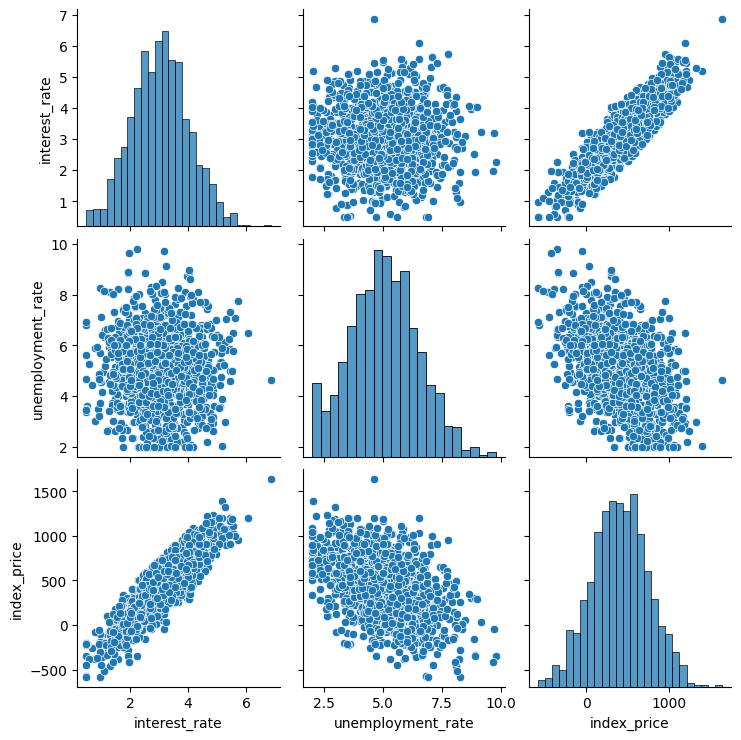

In [9]:
## lets do some visualization
sns.pairplot(df)

In [10]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,0.014553,0.890899
unemployment_rate,0.014553,1.000000,-0.441184
index_price,0.890899,-0.441184,1.000000


<Axes: >

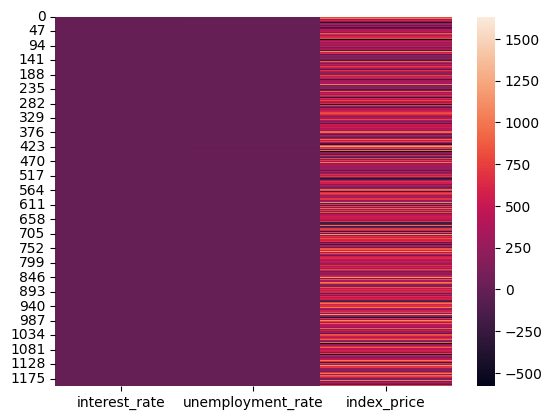

In [11]:
sns.heatmap(df)

Text(0, 0.5, 'Unemployment_rate')

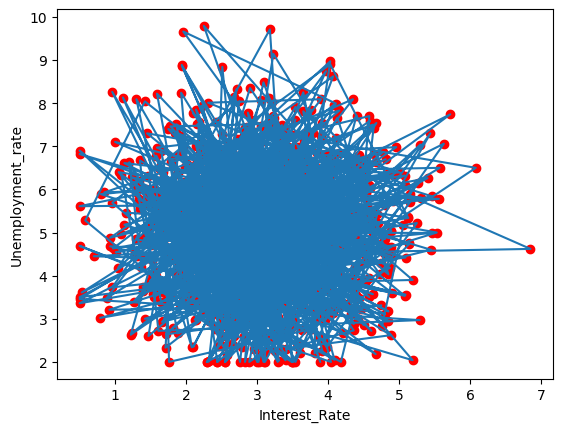

In [12]:
##lets visualize datapoints more closely
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='r')
plt.plot(df['interest_rate'],df['unemployment_rate'])
plt.xlabel('Interest_Rate')
plt.ylabel("Unemployment_rate")

In [13]:
##get the independent and dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [14]:
X.head()

,interest_rate,unemployment_rate
0,3.50,5.19
1,2.86,4.36
2,3.65,5.18
3,4.52,5.81
4,2.77,5.07


In [15]:
y.head()

,index_price
0,534.714897
1,424.911412
2,582.253910
3,784.797318
4,321.169866


In [16]:
##train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [17]:
X_train

,interest_rate,unemployment_rate
845,3.49,6.68
986,4.50,2.86
227,1.92,3.35
1192,2.40,2.76
671,0.93,4.68
...,...,...
1044,2.83,7.43
1095,2.92,5.78
1130,3.32,4.56
860,3.20,6.28


In [18]:
X_test

,interest_rate,unemployment_rate
1178,2.01,4.38
865,2.61,4.13
101,2.58,6.49
439,2.94,3.40
58,3.33,3.94
...,...,...
772,3.63,5.98
494,4.52,5.19
1027,3.12,4.10
806,3.22,5.00


In [19]:
sns.regplot(df['interest_rate'],df['index_price'])#plots data and linear Regression Model fit

TypeError: regplot() takes from 0 to 1 positional arguments but 2 were given

In [20]:
sns.regplot(df)

ValueError: need at least one array to concatenate

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [23]:
X_train

array([[ 0.48555446,  1.1362148 ],
       [ 1.53650812, -1.50284267],
       [-1.14810617, -1.16432483],
       ...,
       [ 0.30866127, -0.32839301],
       [ 0.18379549,  0.8598737 ],
       [ 0.28785031, -1.1574163 ]])

In [24]:
X_test

array([[-1.05445684e+00, -4.52746505e-01],
       [-4.30127931e-01, -6.25459691e-01],
       [-4.61344376e-01,  1.00495278e+00],
       [-8.67470328e-02, -1.12978219e+00],
       [ 3.19066755e-01, -7.56721711e-01],
       [ 1.13069433e+00,  4.31545002e-01],
       [ 2.15043154e+00, -1.01924575e+00],
       [-4.92560821e-01, -8.87983732e-01],
       [-1.18972810e+00, -1.64101322e+00],
       [-6.17426602e-01, -8.74166677e-01],
       [-5.65399193e-01,  3.77589403e-02],
       [-1.56432544e+00, -6.94544965e-01],
       [-1.85567893e+00, -1.63410469e+00],
       [-5.75804675e-01,  1.34478324e-01],
       [-8.46347200e-01,  6.59526407e-01],
       [-9.50402018e-01, -2.04039519e-01],
       [ 5.68798317e-01,  6.11166715e-01],
       [-7.52697865e-01,  6.53930500e-02],
       [ 9.95423069e-01, -5.20519159e-02],
       [ 9.85017587e-01, -7.15270547e-01],
       [-8.98374609e-01,  1.82838016e-01],
       [ 1.53650812e+00,  9.01324866e-01],
       [-1.17932262e+00, -6.04734108e-01],
       [-5.

In [25]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()

In [26]:
regression.fit(X_train,y_train)

LinearRegression()

In [27]:
from sklearn.model_selection import cross_val_score

In [30]:
#neg mean squared error is that we gona get MSE in negative
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)

In [29]:
validation_score

array([-0.59033573, -0.70059044, -0.74756709])

In [34]:
np.mean(validation_score)

-0.6772508236375852

In [31]:
#neg mean squared error is that we gona get MSE in negative
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
#cv=5 means lets take initially we have 1000 records where 900 train, 100 test now to
#perform hyperparameter tuning we can split 900 trian into trian and validation
#when cv=5 last 900/5= 180 will be test and remain- train hence gives MSE
#hence with CV=5 we get 5 differenct accuracies

In [32]:
validation_score

array([-0.8849843 , -0.4300681 , -0.81315473, -0.74049231, -0.51755468])

In [33]:
##now fro average
np.mean(validation_score)

-0.6772508236375852

In [35]:
#3now lets go ahead with prediction
y_pred=regression.predict(X_test)

In [36]:
y_pred

array([ 159.36718784,  372.08356011,  110.73544582,  552.35638709,
        615.59523984,  673.72113735, 1201.82737117,  394.06580137,
        302.75910821,  354.72651792,  229.25228456,   44.83365089,
        103.27356745,  211.20005245,   49.42515332,  151.92203707,
        478.53841281,  169.17536238,  708.17736375,  807.6048016 ,
        107.61557569,  722.0080321 ,  145.65983238,  350.48535814,
        302.54880604,  146.77825361,  975.73439008,  398.80308111,
        260.05595582,   91.71893358,  293.0013579 ,  945.438071  ,
        134.66871175,  554.5119771 ,  686.37459644,  367.63496658,
        408.9420023 ,  336.53687229,  493.17922017,  507.54257354,
       -138.32365266,  453.85116893,  122.42175637,   31.31126476,
        353.43985495,  208.55383786,  430.18986162, -106.37622733,
        469.40583218,  878.06177536,  629.14558577,  605.85708554,
        320.94301701,  301.78359588,  444.40456925,  373.61684885,
        400.22428918,  405.44932509,  716.27564402,  268.98397

In [39]:
## performance metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_pred,y_test)
mae=mean_absolute_error(y_pred,y_test)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

0.2843255620646633
0.21605725330793157
0.5332218694546045


In [40]:
## R2 and adjusted R2
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9999975863799279


In [41]:
#adjusted R2
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.9999975701265941

##assumptions


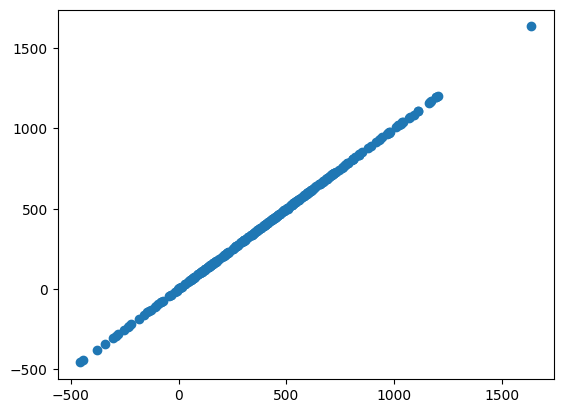

In [42]:
plt.scatter(y_test,y_pred)

In [43]:
residuals=y_test-y_pred

In [44]:
residuals

,index_price
1178,-0.118447
865,-0.132989
101,0.137677
439,-0.236535
58,-0.232487
...,...
772,0.032994
494,-0.060790
1027,-0.196982
806,-0.075260


<ipython-input-48-89addce3bd6b>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals)


<Axes: xlabel='index_price', ylabel='Density'>

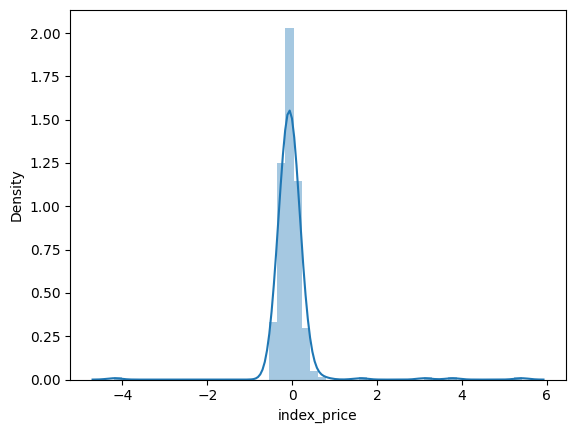

In [48]:
##plot the residuals
sns.distplot(residuals)
#if this type of curve comes it means that the model that we build is good

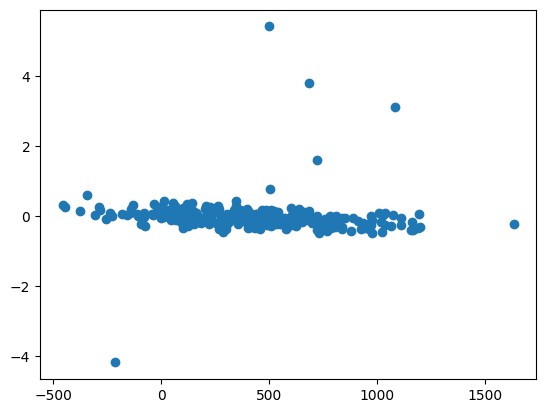

In [49]:
##lets make a scatter plot wrt prediction and residuals
plt.scatter(y_pred,residuals)
# data is uniformly distributed if there is no pattern made

In [51]:
##OLS Linear Regression
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [52]:
model

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.413
Model:                            OLS   Adj. R-squared (uncentered):              0.412
Method:                 Least Squares   F-statistic:                              315.8
Date:                Sun, 10 Nov 2024   Prob (F-statistic):                   1.43e-104
Time:                        20:03:13   Log-Likelihood:                         -6677.3
No. Observations:                 900   AIC:                                  1.336e+04
Df Residuals:                     898   BIC:                                  1.337e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           297.9462     13.469     22.120      0.000     271.511     324.381
x2          -154.5911     13.469    -11.477      0.000    -181.026    -128.156
==============================================================================
Omnibus:                     1170.483   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           249288.134
Skew:                           6.662   Prob(JB):                         0.00
Kurtosis:                      83.437   Cond. No.                         1.02
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
regression.coef_

array([ 297.94623606, -154.59112154])

In [ ]:
##multi correlation
